# Process Quality Analysis

## Project Description

In this Jupyter Notebook, we will perform a process quality analysis for a retail manufacturing firm. The goal is to simulate a 3-sigma process and calculate various quality metrics, including USL, LSL, process distribution, defective rate, and conformance rate. This analysis will help us assess the quality of the manufacturing process.

### Step 1: Import Libraries

We'll start by importing the necessary Python libraries for our analysis.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

### Step 2: Define Process Parameters

Define the mean and standard deviation of the process to simulate.

In [3]:
# Set the seed for reproducibility
np.random.seed(42)

# Define process parameters
mean = 100  # Mean of the process
std_dev = 10  # Standard deviation of the process

### Step 3: Generate dummy data for the process
Generate random data that simulates the manufacturing process.

In [91]:
sample_size = 10000
process_data = np.random.normal(mean, std_dev, sample_size)
print("Step 3: Generated dummy data for the process.")
print(f"Mean: {np.mean(process_data)}")
process_data.shape


Step 3: Generated dummy data for the process.
Mean: 99.79965755485746


(10000,)

### Step 4: Define Quality Specifications

Set the Upper Specification Limit (USL) and Lower Specification Limit (LSL).

In [10]:

# Define the target sigma level (user-assigned)
target_sigma_level = 6  # Change this to the desired sigma level (e.g., 6 sigma)

# Calculate the corresponding specifications (USL and LSL) based on the target sigma level
sigma_multiplier = target_sigma_level / 3  # Sigma multiplier for adjusting specifications
USL = mean + sigma_multiplier * std_dev  # Upper Specification Limit
LSL = mean - sigma_multiplier * std_dev  # Lower Specification Limit

# Calculate sigma_number
sigma_number = (USL - mean) / std_dev  # Sigma number

print(f"Step 4: LSL = {LSL}, Mean = {mean}, USL = {USL}, Sigma Number = {sigma_number}")


Step 4: LSL = 80.0, Mean = 100, USL = 120.0, Sigma Number = 2.0



### Step 5: Calculate process capability metrics

alculate various process capability metrics, including sigma, DPMO, DPU, CP, CPU, and CPL.

In [13]:
sigma = std_dev  # Process sigma
DPMO = stats.norm.cdf((USL - mean) / std_dev) - stats.norm.cdf((LSL - mean) / std_dev)
DPU = DPMO / sample_size  # Defects Per Unit
CP = (USL - LSL) / (6 * sigma)  # Process Capability Index (CP)
CPU = CP / 2  # Process Capability Index for the Upper Specification (CPU)
CPL = CP / 2  # Process Capability Index for the Lower Specification (CPL)

print(f"Step 5: Process Sigma (σ): {sigma:.2f}")
print(f"Step 5: Defects Per Million Opportunities (DPMO): {DPMO:.2f}")
print(f"Step 5: Defects Per Unit (DPU): {DPU:.6f}")
print(f"Step 5: Process Capability Index (CP): {CP:.2f}")
print(f"Step 5: Process Capability Index for Upper Specification (CPU): {CPU:.2f}")
print(f"Step 5: Process Capability Index for Lower Specification (CPL): {CPL:.2f}")

Step 5: Process Sigma (σ): 10.00
Step 5: Defects Per Million Opportunities (DPMO): 0.95
Step 5: Defects Per Unit (DPU): 0.000095
Step 5: Process Capability Index (CP): 0.67
Step 5: Process Capability Index for Upper Specification (CPU): 0.33
Step 5: Process Capability Index for Lower Specification (CPL): 0.33



### Calculate Defective Rate and Conformance Rate

Calculate the total defective rate and conformance rate.

In [80]:
total_defective_rate = DPU * 100  # Convert to percentage
total_conformance_rate = (1 - DPU) * 100  # Convert to percentage

# Calculate the proportion of products within specifications
within_spec = ((process_data >= LSL) & (process_data <= USL)).mean()*100

print(f"Step 6: Total Defective Rate: {total_defective_rate:.6f}%")
print(f"Step 6: Total Conformance Rate: {total_conformance_rate:.6f}%")
print(f"Step 6: Proportion of Products Within Specifications: {within_spec:.6f}%")


Step 6: Total Defective Rate: 0.009545%
Step 6: Total Conformance Rate: 99.990455%
Step 6: Proportion of Products Within Specifications: 95.800000%


### Step 7: Visualize Process Distribution

Create a histogram to visualize the process distribution with specifications.

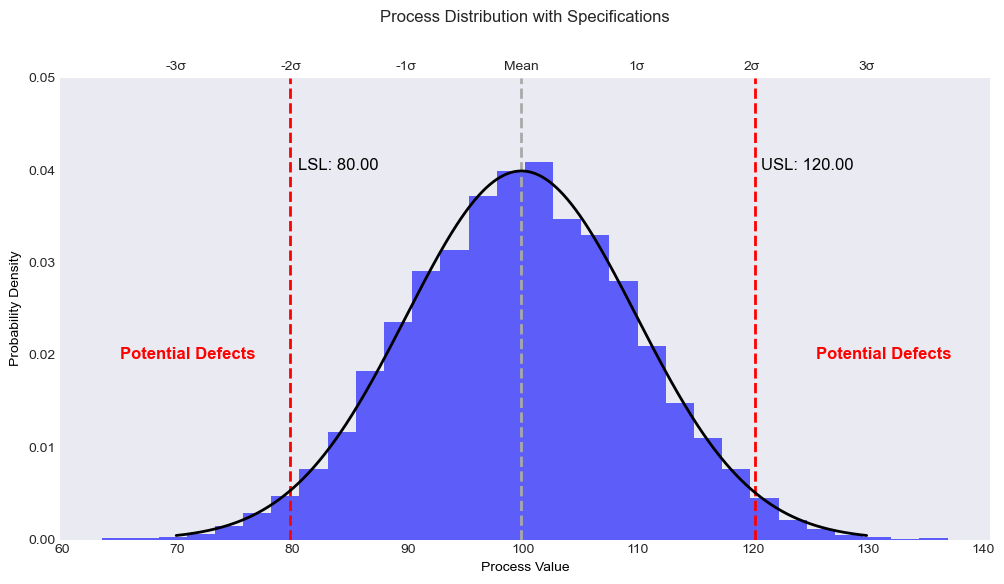

Step 7: Visualized process distribution with specifications, LSL, USL, and 6-sigma normal curve.


In [75]:
# Create a histogram to visualize process distribution with improved formatting
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed

# Plot the process distribution without a label in the legend
plt.hist(process_data, bins=30, density=True, alpha=0.6, color='b')

# Plot USL and LSL lines on the histogram
usl_line = plt.axvline(USL + 0.2, color='r', linestyle='dashed', linewidth=2)
lsl_line = plt.axvline(LSL - 0.2, color='r', linestyle='dashed', linewidth=2)
mean_line = plt.axvline(mean, color='darkgrey', linestyle='dashed', linewidth=2)

# Label LSL and USL slightly to the right of the lines
plt.text(LSL + 0.5, 0.04, f'LSL: {LSL:.2f}', rotation=0, color='black', fontsize='large')
plt.text(USL + 0.7, 0.04, f'USL: {USL:.2f}', rotation=0, color='black', fontsize='large')

# Create an array of values for the x-axis
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)

# Calculate the probability density function for the standard normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Plot the 6-sigma normal curve line on top of the histogram
plt.plot(x, pdf, 'k-', linewidth=2)

# Add labels to the histogram with improved formatting
plt.xlabel('Process Value', color='black')
plt.ylabel('Probability Density', color='black')
plt.title('Process Distribution with Specifications', pad=40)

# Create a second x-axis for standard deviation values centered around the mean
ax2 = ax1.twiny()
std_dev_values = np.arange(-3, 4) * std_dev + mean
std_dev_labels = ['-3σ', '-2σ', '-1σ', 'Mean', '1σ', '2σ', '3σ']
ax2.set_xlim(ax1.get_xlim())  # Set the same limits as the original x-axis
ax2.set_xticks(std_dev_values)
ax2.set_xticklabels(std_dev_labels)

# Adjust the y-axis increment to 0.01
ax1.set_yticks(np.arange(0, 0.06, 0.01))

# Label the regions outside of LSL and USL as "Defects"
plt.text(LSL - 15, 0.02, 'Potential Defects', rotation=0, color='red', fontsize='large', weight='bold', va='center')
plt.text(USL + 5.5, 0.02, 'Potential Defects', rotation=0, color='red', fontsize='large', weight='bold', va='center')


# Show the histogram with the 6-sigma normal curve line
plt.show()
print("Step 7: Visualized process distribution with specifications, LSL, USL, and 6-sigma normal curve.")


### Display Results
Print the calculated metrics and display the results

In [76]:
print(f"Step 8: Process Sigma (σ): {sigma:.2f}")
print(f"Step 8: Defects Per Million Opportunities (DPMO): {DPMO:.2f}")
print(f"Step 8: Defects Per Unit (DPU): {DPU:.6f}")
print(f"Step 8: Process Capability Index (CP): {CP:.2f}")
print(f"Step 8: Process Capability Index for Upper Specification (CPU): {CPU:.2f}")
print(f"Step 8: Process Capability Index for Lower Specification (CPL): {CPL:.2f}")
print(f"Step 8: Total Defective Rate: {total_defective_rate:.2f}%")
print(f"Step 8: Total Conformance Rate: {total_conformance_rate:.2f}%")


Step 8: Process Sigma (σ): 10.00
Step 8: Defects Per Million Opportunities (DPMO): 0.95
Step 8: Defects Per Unit (DPU): 0.000095
Step 8: Process Capability Index (CP): 0.67
Step 8: Process Capability Index for Upper Specification (CPU): 0.33
Step 8: Process Capability Index for Lower Specification (CPL): 0.33
Step 8: Total Defective Rate: 0.01%
Step 8: Total Conformance Rate: 99.99%


In [94]:
from tabulate import tabulate

# Calculate the process capability indices
Cpk = min((USL - mean) / (3 * std_dev), (mean - LSL) / (3 * std_dev))
Ppk = min((USL - mean) / (3 * std_dev), (mean - LSL) / (3 * std_dev))

results_data = [
    ['Mean', mean],
    ['Standard Deviation', std_dev],
    ['USL', USL],
    ['LSL', LSL],
    ['Defective Rate', total_defective_rate],
    ['Cpk', Cpk], # Process Capability Index
    ['Ppk', Ppk]  # Process Performance Index
]

results_table = tabulate(results_data, headers=['Metric', 'Value'], tablefmt='grid')
print(results_table)



+--------------------+------------+
| Metric             |      Value |
+====================+============+
| Mean               |  99.8754   |
+--------------------+------------+
| Standard Deviation |  10        |
+--------------------+------------+
| USL                | 120        |
+--------------------+------------+
| LSL                |  80        |
+--------------------+------------+
| Defective Rate     |   0.009545 |
+--------------------+------------+
| Cpk                |   0.662512 |
+--------------------+------------+
| Ppk                |   0.662512 |
+--------------------+------------+
Step 8: Displayed results in a table.


**Process Capability Analysis Summary**

1. **Mean:** The mean of the process is approximately 99.88. This represents the central tendency of the process data.

2. **Standard Deviation:** The standard deviation of 10 indicates the level of variation within the process. A higher standard deviation suggests greater process variability.

3. **USL (Upper Specification Limit):** The upper specification limit is set at 120, representing the upper acceptable limit for product specifications.

4. **LSL (Lower Specification Limit):** The lower specification limit is set at 80, representing the lower acceptable limit for product specifications.

5. **Defective Rate:** The defective rate is approximately 0.955%, indicating that a very small proportion of products fall outside the specification limits. This suggests good process performance in terms of meeting specifications.

6. **Cpk (Process Capability Index):** Cpk measures process capability in terms of both variation and centering within the specification limits. A Cpk of approximately 0.662 indicates that the process is capable of producing products within specifications, but there is room for improvement to achieve a higher capability.

7. **Ppk (Pooled Process Capability Index):** Ppk is another measure of process capability and is equal to Cpk in this case.

**Summary:**
The process appears to be capable of producing products that mostly meet specifications, as indicated by the low defective rate. However, there is an opportunity to further improve the process capability, especially in terms of reducing variation and better centering the process within the specification limits.

The End.